In [1]:
# Basics
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from pydataset import data
from scipy import math


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from math import sqrt
from scipy.stats import pearsonr, spearmanr

# Custom
import env
import wrangle_zillow

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire

In [2]:
df = wrangle_zillow.wrangle_zillow()
df.head()

Saving to .csv


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,...,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,...,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,...,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,...,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410
4,10887214,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,...,3101.0,96451.0,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940


In [3]:
# Check shape
df.shape

(67977, 21)

In [4]:
# Column info
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror'],
      dtype='object')

### Gonna do a little bit of Prep work and Feature Engineering:
- Create an age column.
- Split the dataset into Train, Validate and Test samples.
- Establish x and y variables.
- Scale the x variables.

In [5]:
# Lets create an age column
df.yearbuilt = df.yearbuilt.astype(int)
df['age'] = 2017 - df.yearbuilt
df.yearbuilt = df.yearbuilt.astype(object)



# Fix Latitude & longitude
df.latitude = df.latitude / 1_000_000
df.longitude = df.longitude / 1_000_000


#Function to handle missing data
df = wrangle_zillow.handle_missing_values(df, prop_required_column = .5, prop_required_row = .5)


df.head().T

,0,1,2,3,4
parcelid,14297519,17052889,14186244,12177905,10887214
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,3.0
buildingqualitytypeid,6.0,6.0,6.0,8.0,8.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,1312.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0
latitude,33.634931,34.449266,33.886168,34.24518,34.18512
longitude,-117.869207,-119.281531,-117.82317,-118.240722,-118.41464
lotsizesquarefeet,4506.0,12647.0,8432.0,13038.0,278581.0
rawcensustractandblock,60590630.072012,61110010.023006,60590218.022012,60373001.001006,60371236.012


In [6]:
# Remove outliers in bath, bedroom, squarefeet, lotsize, and tax value using IQR approach. K=3.0 to limit data removal to <20% 
df= wrangle_zillow.remove_outliers(df, 3.0, ['bedroomcnt', 'bathroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'age', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'])
df.shape

Number of observations removed: 1471


(66506, 22)

In [7]:
# train, validate, test split
train, validate, test = wrangle_zillow.split_data(df)

train <> (37242, 22)
validate <> (15962, 22)
test <> (13302, 22)


In [8]:
# Isolating our target variable
x_train = train.drop(columns=['logerror'])
y_train = train.logerror

x_validate = validate.drop(columns=['logerror'])
y_validate = validate.logerror

x_test = test.drop(columns=['logerror'])
y_test = test.logerror

# Scaling
x_train_scaled, x_validate_scaled, x_test_scaled = wrangle_zillow.scale_data(x_train, x_validate, x_test)

train_scaled <> (37242, 21)
validate_scaled <> (15962, 21)
test_scaled <> (13302, 21)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66506 entries, 0 to 77573
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      66506 non-null  int64  
 1   bathroomcnt                   66506 non-null  float64
 2   bedroomcnt                    66506 non-null  float64
 3   buildingqualitytypeid         66506 non-null  float64
 4   calculatedfinishedsquarefeet  66506 non-null  float64
 5   fips                          66506 non-null  float64
 6   latitude                      66506 non-null  float64
 7   longitude                     66506 non-null  float64
 8   lotsizesquarefeet             66506 non-null  float64
 9   rawcensustractandblock        66506 non-null  float64
 10  regionidcity                  66506 non-null  float64
 11  regionidcounty                66506 non-null  float64
 12  regionidzip                   66506 non-null  float64
 13  r

## Exploration

### Univariate up first

- We'll explore our variables with visualizations.

In [10]:
# Glancing at our data
df.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
count,6.650600e+04,66506.000000,66506.000000,66506.000000,66506.000000,66506.000000,66506.000000,66506.000000,6.650600e+04,6.650600e+04,...,66506.000000,66506.000000,66506.000000,6.650600e+04,6.650600e+04,66506.0,6.650600e+04,66506.000000,66506.000000,66506.000000
mean,1.302503e+07,2.167504,2.961898,6.264668,1636.329534,6049.488708,34.005285,-118.190665,2.761375e+04,6.049786e+07,...,2495.493955,96599.345954,1.607359,1.556973e+05,3.956601e+05,2016.0,2.399629e+05,4866.449514,0.016085,48.447629
std,2.147456e+06,0.792065,0.963131,1.239826,688.282625,21.012624,0.269705,0.362125,1.204908e+05,2.085596e+05,...,815.331195,3136.944951,2.898887,1.104811e+05,2.744707e+05,0.0,2.069927e+05,3181.713643,0.162769,22.654981
min,1.071186e+07,0.000000,0.000000,3.000000,128.000000,6037.000000,33.339527,-119.475265,2.360000e+02,6.037101e+07,...,1286.000000,95982.000000,0.000000,4.400000e+01,3.254000e+03,2016.0,1.610000e+02,19.920000,-4.655420,1.000000
25%,1.153175e+07,2.000000,2.000000,6.000000,1150.000000,6037.000000,33.805667,-118.403188,6.000000e+03,6.037401e+07,...,1286.000000,96213.000000,0.000000,8.084450e+04,1.957100e+05,2016.0,7.709775e+04,2585.572500,-0.023703,31.000000
50%,1.261030e+07,2.000000,3.000000,6.000000,1474.000000,6037.000000,34.009455,-118.156931,7.313000e+03,6.037621e+07,...,3101.000000,96415.000000,0.000000,1.289360e+05,3.405195e+05,2016.0,1.920000e+05,4210.840000,0.006083,48.000000
75%,1.426362e+07,3.000000,4.000000,7.000000,1962.000000,6059.000000,34.178149,-117.913508,1.017975e+04,6.059052e+07,...,3101.000000,96993.000000,0.000000,1.986595e+05,5.233900e+05,2016.0,3.398440e+05,6329.172500,0.036746,64.000000
max,1.629608e+08,6.000000,9.000000,10.000000,4514.000000,6111.000000,34.818767,-117.572338,6.971010e+06,6.111009e+07,...,3101.000000,399675.000000,12.000000,1.507442e+06,1.559013e+06,2016.0,1.450991e+06,18159.810000,3.394544,139.000000


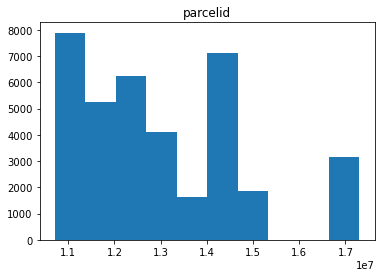

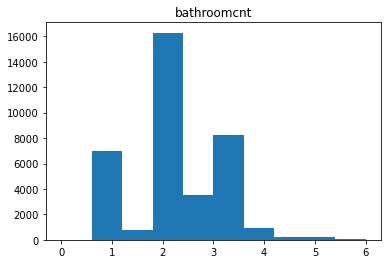

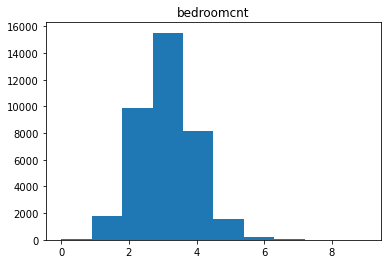

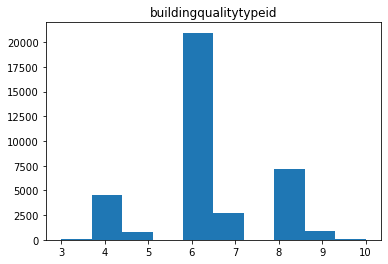

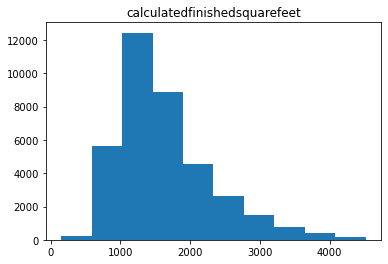

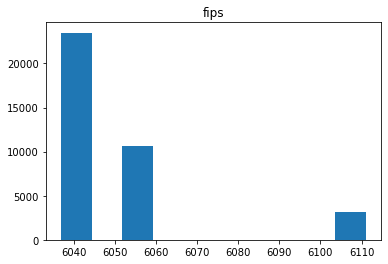

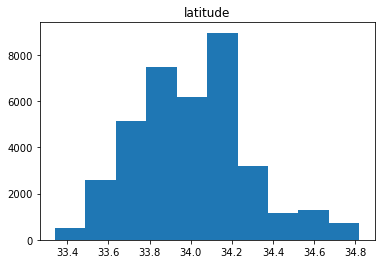

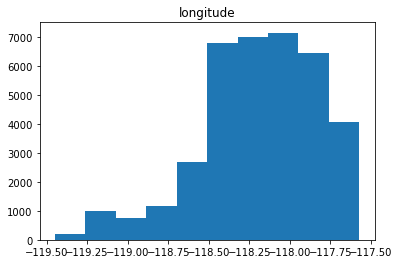

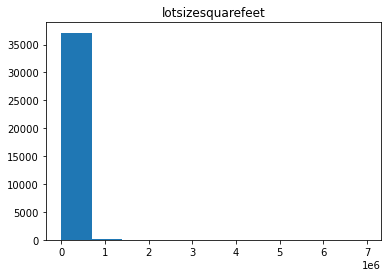

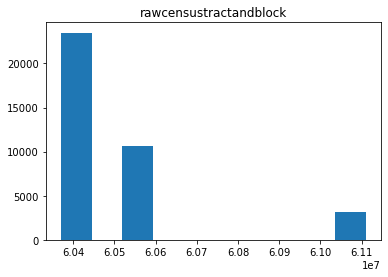

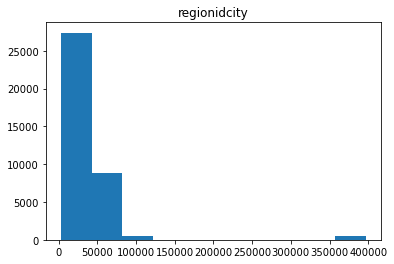

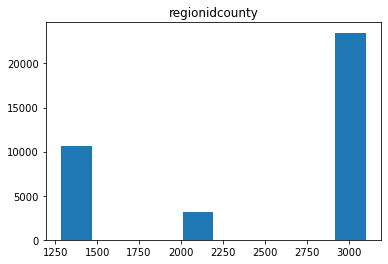

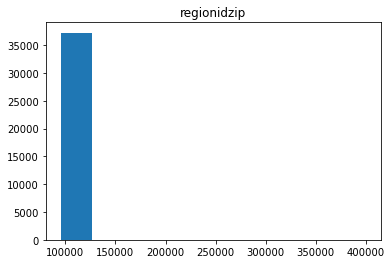

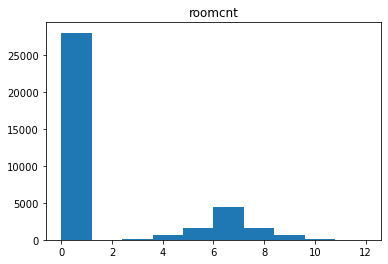

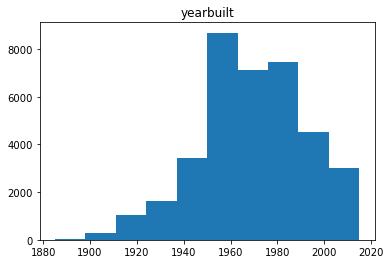

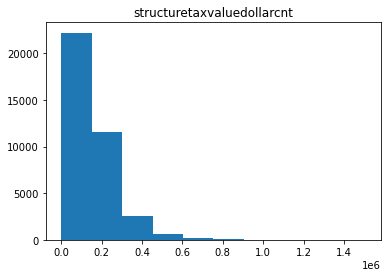

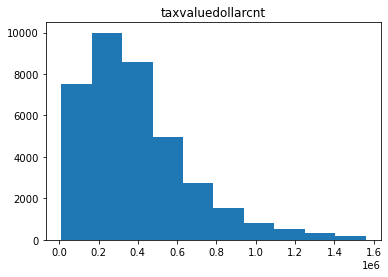

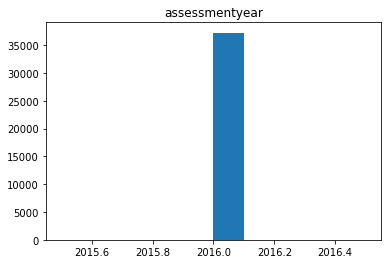

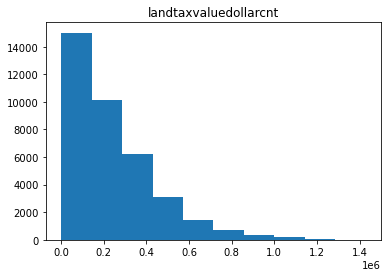

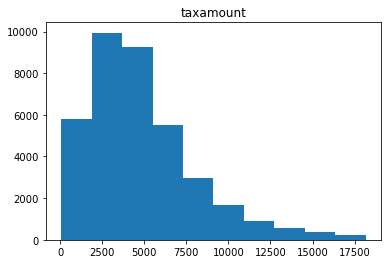

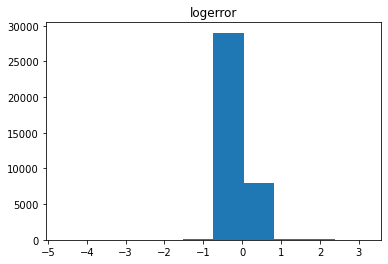

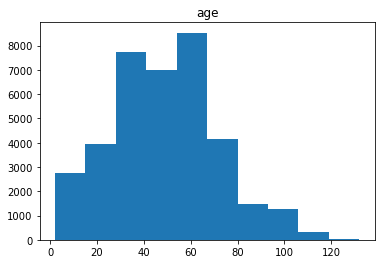

In [11]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

#### Takeaways
- For the most part, a lot of variables are normally distributed.
- structuretaxvaluedollarcnt, taxvaluedollarcnt, landtaxvaluedollarcnt, taxamount seem to be skewed to the right.

### Multivariate up next
- We're focusing on variables that will give us insight into our target.

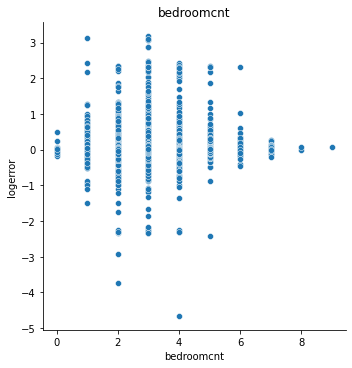

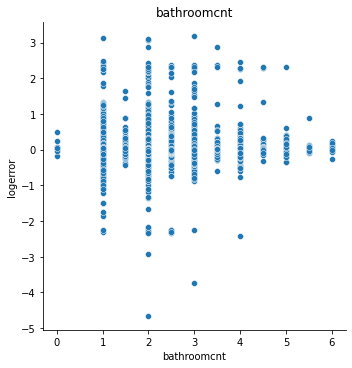

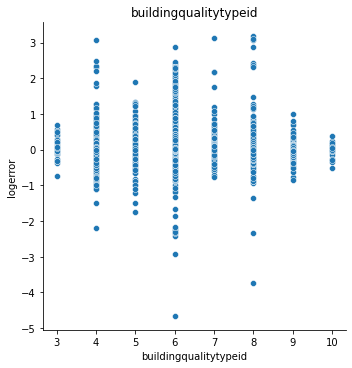

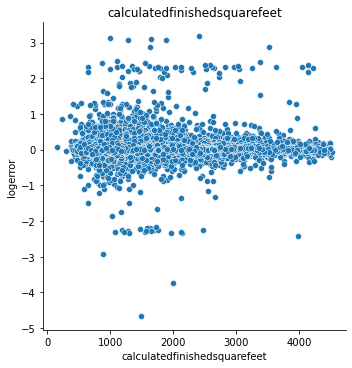

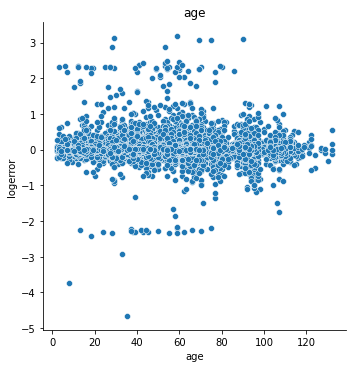

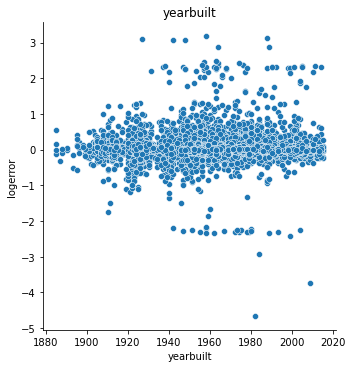

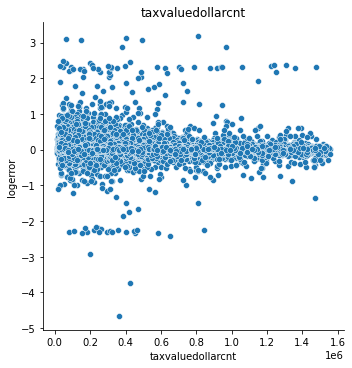

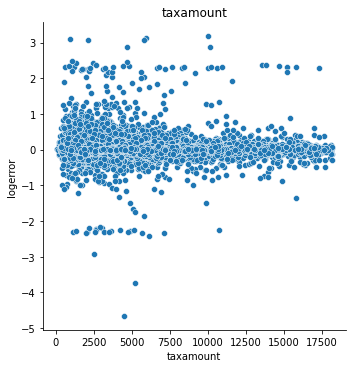

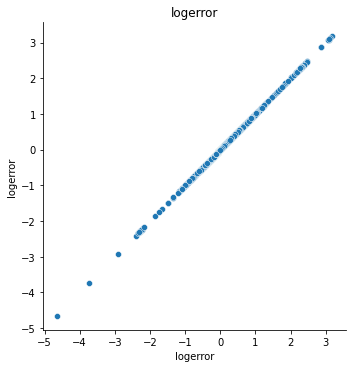

In [12]:
explore_columns = ['bedroomcnt', 'bathroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'age', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'logerror']

for col in train[explore_columns]:
    sns.relplot(x=train[col], y=train.logerror)
    plt.title(col)
    plt.show()

#### Takeaways
- Taxamount and Square feet gets overestimated as it decreases in value.
- Logerror seems to increase after 1940s.

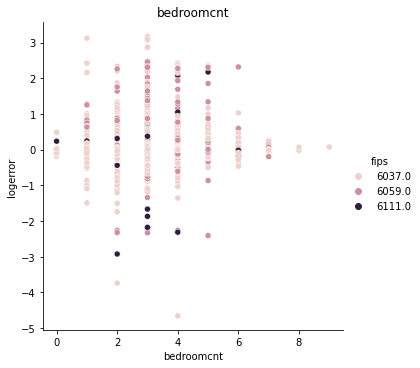

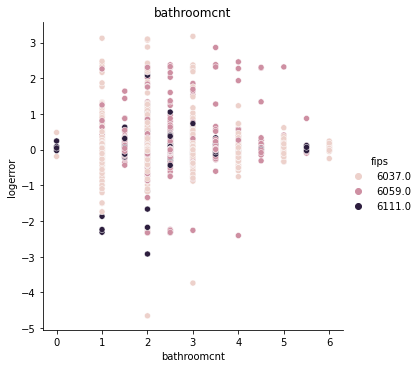

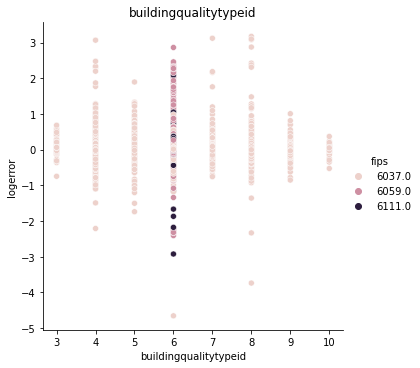

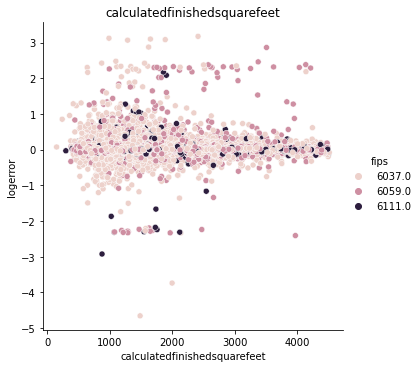

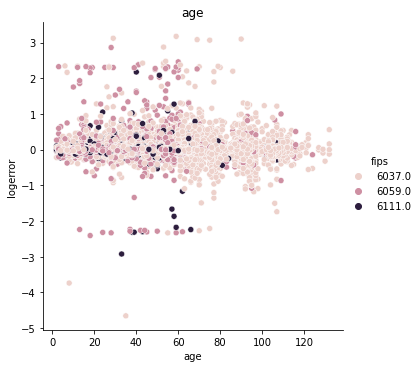

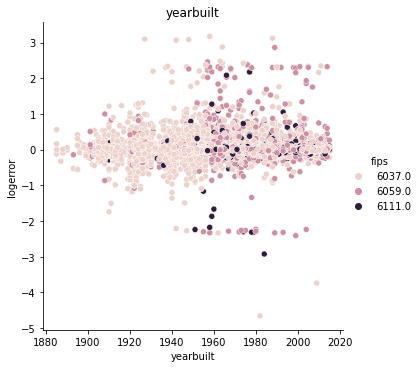

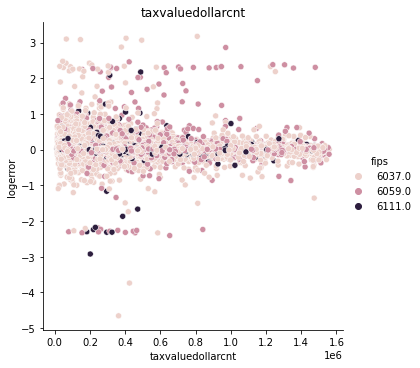

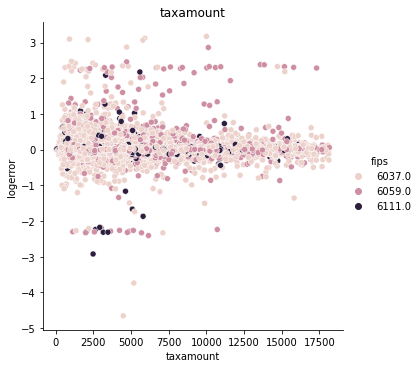

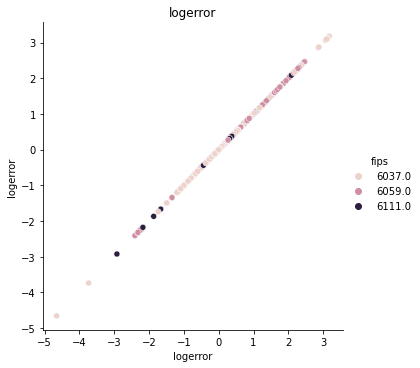

In [13]:
# This group of visuals compares those graphs with fips (county)
for col in train[explore_columns]:
    sns.relplot(x=train[col], y=train.logerror, hue=train.fips)
    plt.title(col)
    plt.show()

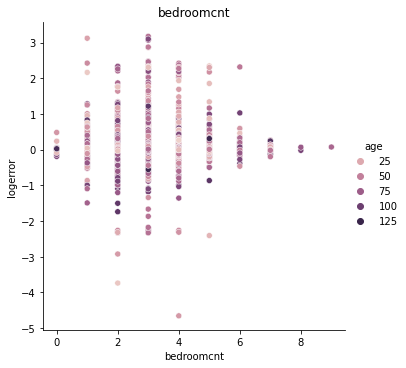

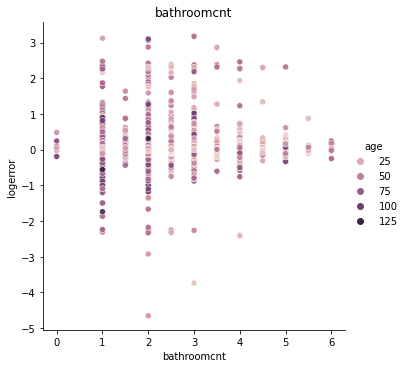

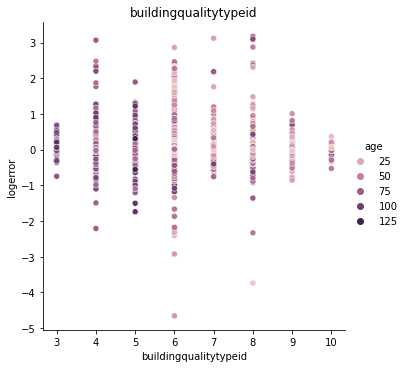

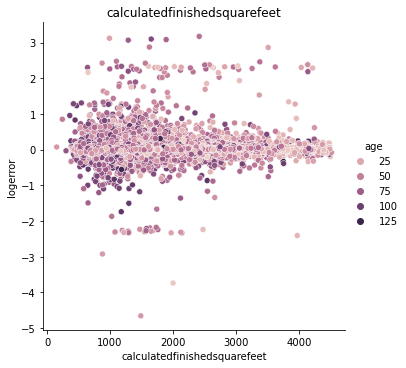

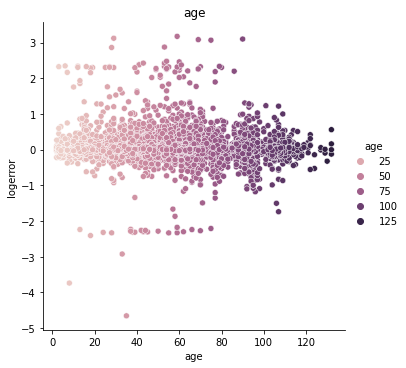

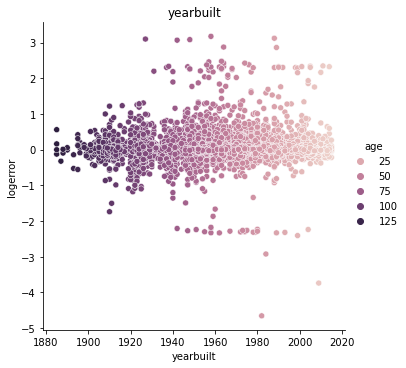

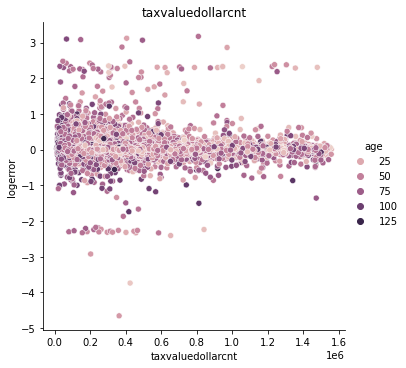

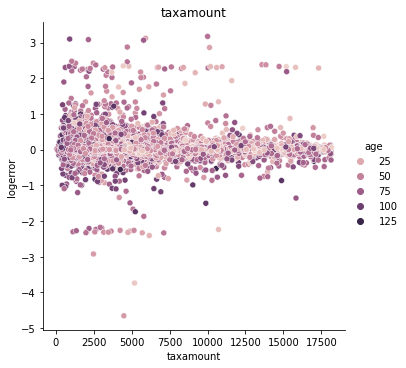

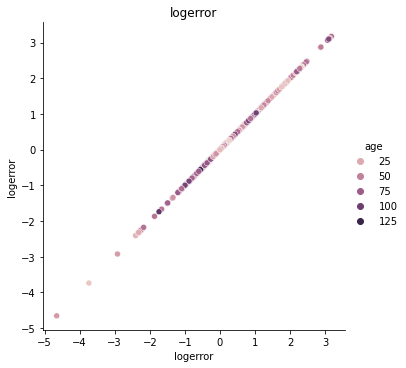

In [14]:
# This last group of graphs will compare features by logerror and group by age
for col in train[explore_columns]:
    sns.relplot(x=train[col], y=train.logerror, hue=train.age)
    plt.title(col)
    plt.show()

### Lets check for correlation with a heatmap

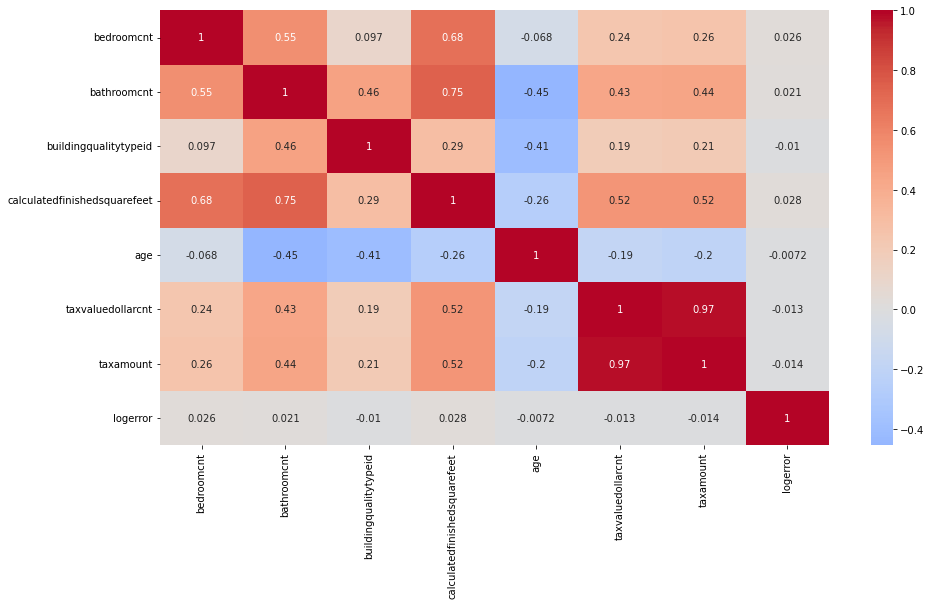

In [15]:
# Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(train[explore_columns].corr(), cmap='coolwarm', center=0, annot=True)
plt.show()

### Takeaways
- Newer homes tend to have higher logerror than older homes.
- Higher taxamounts seem to have a lower rate of logerror.
- Probably should bin the age variable.
- Weird, but LA County (fips 6037) was the only county to track buildingqualitytypeid
- According to the heatmap, calculatedfinishedsquarefeet was the feature that showed the most impact on logerror.

### Riddle me this:

- Does county have an affect on logerror?
- Is there a relationship between lot size and logerror?
- Does age affect logerror?
- Can tax variables be used to estimate logerror?

### Question 1: 

#### Does county have an affect on logerror?

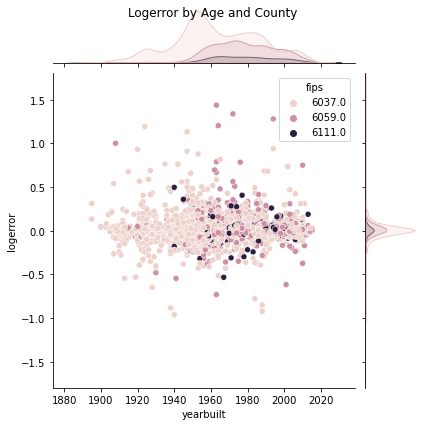

In [16]:
# Lets compare fips on our last graph

sample = train.sample(5000)
sns.jointplot('yearbuilt', 'logerror', data=sample, kind='scatter', hue='fips', ylim=(-1.8, 1.8))
plt.suptitle('Logerror by Age and County')

plt.show()

### Takeaways:
- The graphs shows that older homes seem to primarily be in LA county.

### Question 2: 

#### Is there a relationship between square feet and logerror?

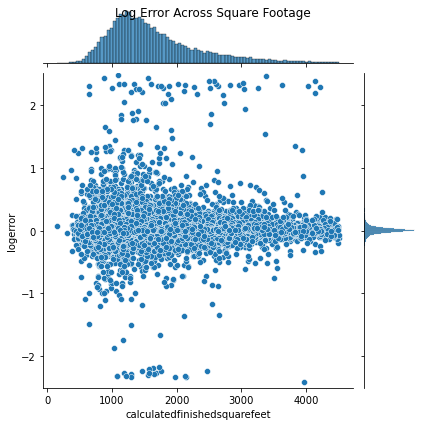

In [17]:
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, ylim=(-2.5, 2.5))
plt.suptitle('Log Error Across Square Footage')
plt.show()

### Takeaways

- Smaller homes have a higher log error, for sure.
- As home size increases, the log error decreases, suggesting some sort of correlation.

### Question 3
- Does age affect logerror?

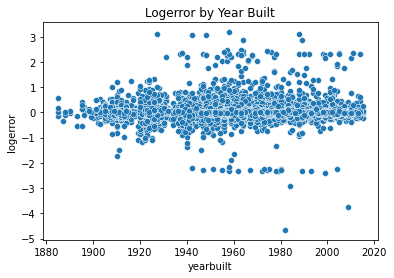

In [18]:
sns.scatterplot(data=train, y='logerror', x='yearbuilt')
plt.title('Logerror by Year Built')
plt.show()

#### H0: Homes built before 1950 have no difference in logerror than homes built past 1950
#### Ha: Homes built before 1950 have significant differences in logerror than homes built past 1950

In [19]:
#There is definitely a difference between these two groups. 
#I will run a two-sample, two-tailed t-test just to confirm the sample sizes aren't leading us to make false assumptions. 
#It is clear the variances between the two groups is different, but let's run a test for practice.

# Test the assumption of equal variance.

stats.levene(train[train.yearbuilt <= 1950].logerror, 
             train[train.yearbuilt > 1950].logerror
            )

LeveneResult(statistic=277.85679763045897, pvalue=3.7002541892347564e-62)

In [20]:
t, p = stats.ttest_ind(train[train.yearbuilt <= 1950].logerror,
                train[train.yearbuilt >1950].logerror,
                equal_var=False)

print(t, p / 2)

### Decide whether to reject or accept the null hypothesis

if p < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

-2.029101066108826 0.02123761904265606
Reject Null Hypothesis


### Question 4

#### Is the amount of bathrooms connected to a homes value?

Null Hypothesis: bath_count is independent of home_value.

Alternate Hypothesis: bath_count is correlated with home_value

Alpha =0.05

In [21]:
# Calculate Pearson Correlation Coefficient for bathroom hypothesis

x = x_train_scaled.bathroomcnt
y = y_train

corr, p = stats.pearsonr(x, y)
corr, p

(0.020795781903219165, 5.982296332311848e-05)

In [22]:
### Decide whether to reject or accept the null hypothesis

if p < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis


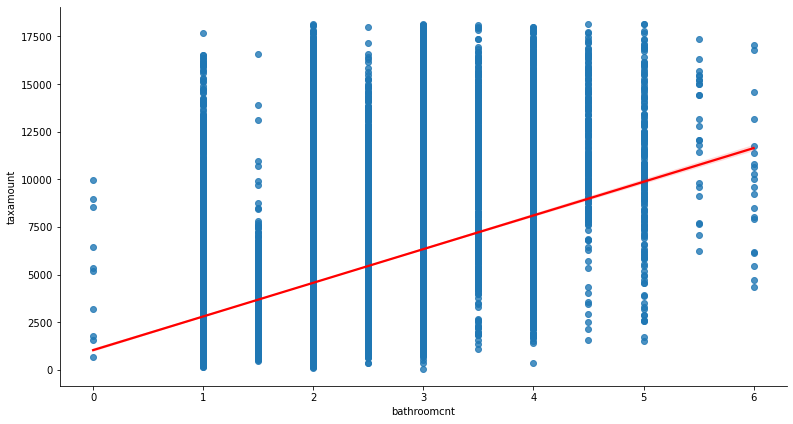

In [23]:
continous_with_continous = sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}}, x_vars = ['bathroomcnt'],
                 y_vars = ['taxamount'])

continous_with_continous.fig.set_size_inches(16,7)

### Cluster time
- Visualize and compare metrics.
- Use calculatedfinishedsquarefeet and taxamount to find what k value has the best inertia.

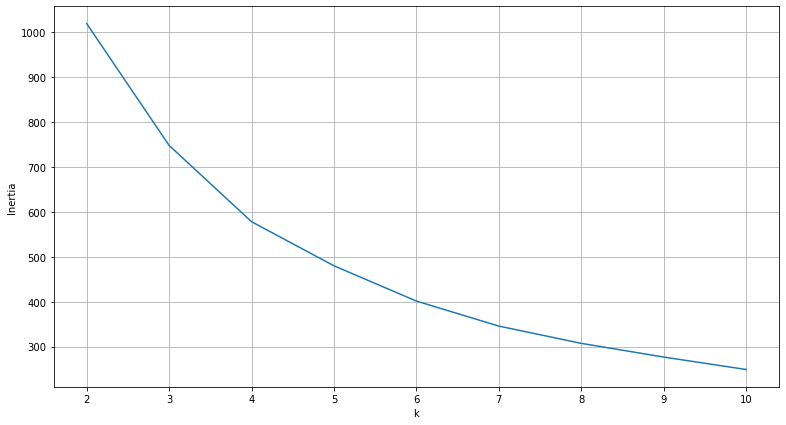

In [24]:
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_train_scaled[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

### K value of 3 seems to be the one.
- Next, we build the cluster model and fit to training sample.

In [25]:
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_tax'] = kmeans.predict(X)
train.cluster_area_tax = train.cluster_area_tax.astype('category')

# means of each feature by cluster
train.groupby('cluster_area_tax').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_area_tax,,,,,,,,,,,,,,,,,,,,,
0,1.309047e+07,2.425265,3.276560,6.563049,1879.113649,6050.847399,34.007044,-118.194048,21071.870542,6.051131e+07,...,2436.346750,96601.549301,1.998396,182642.372336,475273.714657,2016.0,292631.342320,5809.001274,0.014375,44.608569
1,1.291702e+07,1.772465,2.570662,5.943927,1215.733360,6047.869618,34.013727,-118.186171,34157.941343,6.048188e+07,...,2571.136764,96541.478878,1.298703,94334.226978,223524.909026,2016.0,129190.682048,2826.565226,0.015728,53.285837
2,1.325753e+07,3.115612,3.742228,6.771273,2761.542773,6053.043113,33.961961,-118.203632,16696.420694,6.053285e+07,...,2336.006807,96719.743136,1.864080,345107.461992,918502.484910,2016.0,573395.022918,11070.051815,0.021900,38.873383


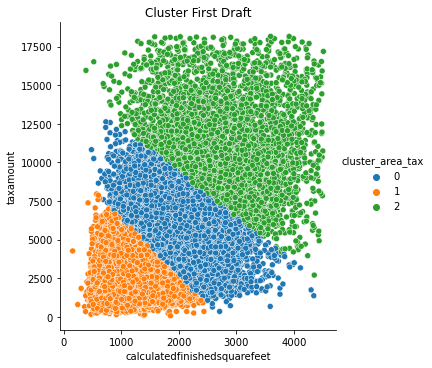

In [26]:
# Visualize clusters
sns.relplot(data=train, y='taxamount', x='calculatedfinishedsquarefeet', hue='cluster_area_tax')
plt.title('Cluster First Draft')

plt.show()

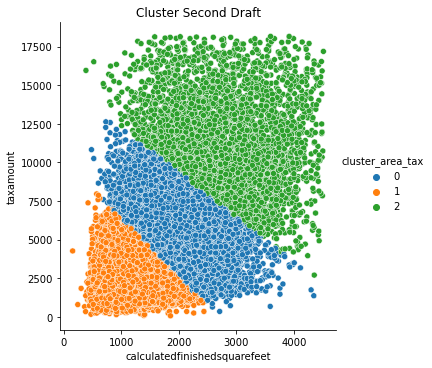

In [27]:
# rinse and repeat
train['cluster_area_tax'] = kmeans.predict(X)
train.cluster_area_tax = train.cluster_area_tax.astype('category')

# visualize
sns.relplot(data=train, y='taxamount', x='calculatedfinishedsquarefeet', hue='cluster_area_tax')
plt.title('Cluster Second Draft')

plt.show()

### Continued Cluster Exploration

- I know from my earlier exploration that age is an indicator of logerror.
- I want to check with calculatedfinishedsquarefeet and taxamount as well, and then perhaps seperately.

In [28]:
# features to make cluster with
cols = ['calculatedfinishedsquarefeet', 'taxamount', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_tax_age'] = kmeans.predict(X)
train.cluster_area_tax_age = train.cluster_area_tax_age.astype('category')

# Visualize clusters
train.groupby('cluster_area_tax_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_area_tax_age,,,,,,,,,,,,,,,,,,,,,
0,1.212964e+07,1.593565,2.653855,5.333626,1407.792884,6039.417307,34.023906,-118.256011,8493.005491,6.039759e+07,...,2997.243136,96230.461234,0.328135,110109.441028,372200.209313,2016.0,262090.768285,4636.155385,0.009767,88.278717
1,1.290284e+07,2.005879,3.064274,6.104805,1547.082646,6048.082759,33.995994,-118.202500,23402.386998,6.048378e+07,...,2541.422838,96516.030865,2.088525,120694.435048,351194.995873,2016.0,230500.560825,4311.189142,0.018009,56.974618
2,1.342422e+07,2.515968,2.923662,6.722982,1799.905927,6054.303420,34.010507,-118.157719,38080.160344,6.054589e+07,...,2290.088273,96770.717581,1.438696,209224.523902,451774.179679,2016.0,242549.655777,5551.814877,0.015478,26.503767


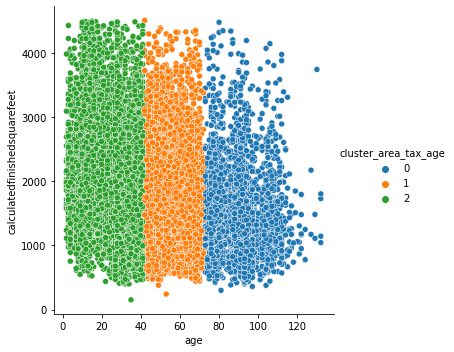

In [29]:
sns.relplot(data=train, y='calculatedfinishedsquarefeet', x='age', hue='cluster_area_tax_age')
plt.show()


### Not happy with these results, I'm going to refine my features

In [30]:
# features to make cluster with
cols = ['calculatedfinishedsquarefeet', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_area_age'] = kmeans.predict(X)
train.cluster_area_age = train.cluster_area_age.astype('category')

# Visualize clusters
train.groupby('cluster_area_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_area_age,,,,,,,,,,,,,,,,,,,,,
0,1.290284e+07,2.005879,3.064274,6.104805,1547.082646,6048.082759,33.995994,-118.202500,23402.386998,6.048378e+07,...,2541.422838,96516.030865,2.088525,120694.435048,351194.995873,2016.0,230500.560825,4311.189142,0.018009,56.974618
1,1.212964e+07,1.593565,2.653855,5.333626,1407.792884,6039.417307,34.023906,-118.256011,8493.005491,6.039759e+07,...,2997.243136,96230.461234,0.328135,110109.441028,372200.209313,2016.0,262090.768285,4636.155385,0.009767,88.278717
2,1.342422e+07,2.515968,2.923662,6.722982,1799.905927,6054.303420,34.010507,-118.157719,38080.160344,6.054589e+07,...,2290.088273,96770.717581,1.438696,209224.523902,451774.179679,2016.0,242549.655777,5551.814877,0.015478,26.503767


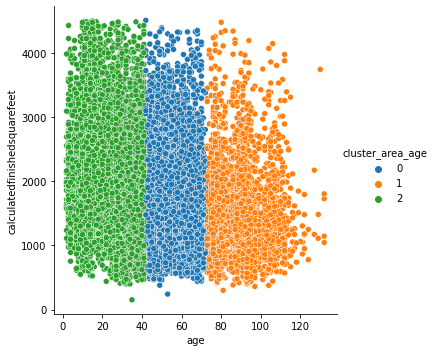

In [31]:
# Visualize
# Refinement didn't seem to change the cluster 
sns.relplot(data=train, y='calculatedfinishedsquarefeet', x='age', hue='cluster_area_age')
plt.show()

### Takeaways
- This clustering seems to just seperate homes by age into 3 groups(0-40, 40-75, 75 and up)
- While the metrics for each cluster do have some distinct differences, most of the older homes will also only be in LA County, per our previous data

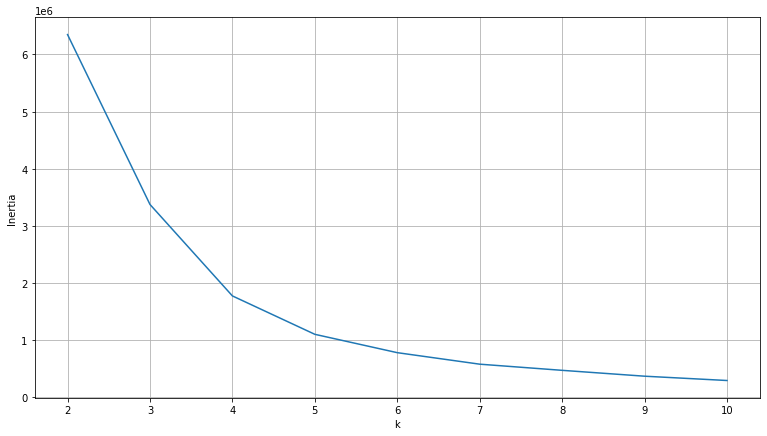

In [32]:
cols = ['latitude', 'longitude', 'age']
X = x_train_scaled[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

### Lets cluster our geography

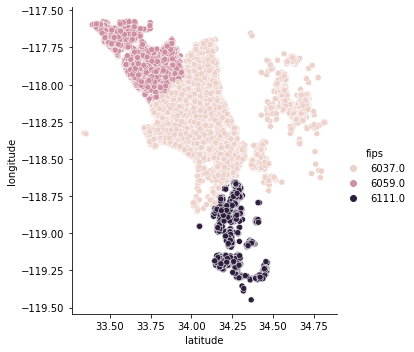

In [33]:
# a quick reference to county by geographical location
sns.relplot(data=train, x='latitude', y='longitude', hue='fips')
plt.show()

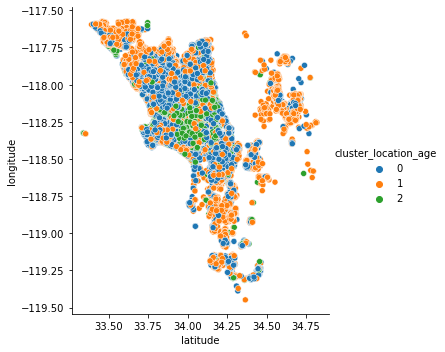

In [34]:
# Put together the cluster
cols = ['latitude', 'longitude', 'age']
X = x_train_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
train['cluster_location_age'] = kmeans.predict(X)
train.cluster_location_age = train.cluster_location_age.astype('category')

# Visualize clusters
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_location_age')
plt.show()

In [35]:
# metrics
train.groupby('cluster_location_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_location_age,,,,,,,,,,,,,,,,,,,,,
0,1.290284e+07,2.005879,3.064274,6.104805,1547.082646,6048.082759,33.995994,-118.202500,23402.386998,6.048378e+07,...,2541.422838,96516.030865,2.088525,120694.435048,351194.995873,2016.0,230500.560825,4311.189142,0.018009,56.974618
1,1.342422e+07,2.515968,2.923662,6.722982,1799.905927,6054.303420,34.010507,-118.157719,38080.160344,6.054589e+07,...,2290.088273,96770.717581,1.438696,209224.523902,451774.179679,2016.0,242549.655777,5551.814877,0.015478,26.503767
2,1.212964e+07,1.593565,2.653855,5.333626,1407.792884,6039.417307,34.023906,-118.256011,8493.005491,6.039759e+07,...,2997.243136,96230.461234,0.328135,110109.441028,372200.209313,2016.0,262090.768285,4636.155385,0.009767,88.278717


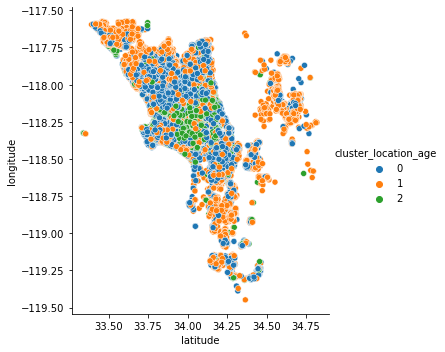

In [36]:
# Rinse and Repeat (cluster again)
train['cluster_location_age'] = kmeans.predict(X)
train.cluster_location_age = train.cluster_location_age.astype('category')

# Visualize clusters
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_location_age')
plt.show()

### Takeaways
- Cluster 3 seems to consist of only LA County(fips 6037), as well as older homes and a tendency for more negative logerrors.
- Doesnt divide the data too much differently than if we grouped by fips.

In [37]:
# calculatedfinishedsquarefeet and age
train.groupby('cluster_area_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_area_age,,,,,,,,,,,,,,,,,,,,,
0,1.290284e+07,2.005879,3.064274,6.104805,1547.082646,6048.082759,33.995994,-118.202500,23402.386998,6.048378e+07,...,2541.422838,96516.030865,2.088525,120694.435048,351194.995873,2016.0,230500.560825,4311.189142,0.018009,56.974618
1,1.212964e+07,1.593565,2.653855,5.333626,1407.792884,6039.417307,34.023906,-118.256011,8493.005491,6.039759e+07,...,2997.243136,96230.461234,0.328135,110109.441028,372200.209313,2016.0,262090.768285,4636.155385,0.009767,88.278717
2,1.342422e+07,2.515968,2.923662,6.722982,1799.905927,6054.303420,34.010507,-118.157719,38080.160344,6.054589e+07,...,2290.088273,96770.717581,1.438696,209224.523902,451774.179679,2016.0,242549.655777,5551.814877,0.015478,26.503767


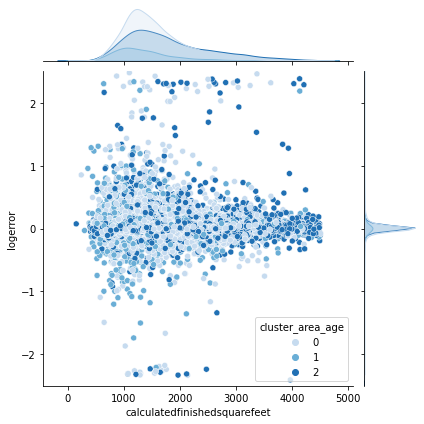

In [38]:
# calculatedfinishedsquarefeet and age
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_area_age', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

In [39]:
# calculatedfinishedsquarefeet and taxamount
train.groupby('cluster_area_tax').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_area_tax,,,,,,,,,,,,,,,,,,,,,
0,1.309047e+07,2.425265,3.276560,6.563049,1879.113649,6050.847399,34.007044,-118.194048,21071.870542,6.051131e+07,...,2436.346750,96601.549301,1.998396,182642.372336,475273.714657,2016.0,292631.342320,5809.001274,0.014375,44.608569
1,1.291702e+07,1.772465,2.570662,5.943927,1215.733360,6047.869618,34.013727,-118.186171,34157.941343,6.048188e+07,...,2571.136764,96541.478878,1.298703,94334.226978,223524.909026,2016.0,129190.682048,2826.565226,0.015728,53.285837
2,1.325753e+07,3.115612,3.742228,6.771273,2761.542773,6053.043113,33.961961,-118.203632,16696.420694,6.053285e+07,...,2336.006807,96719.743136,1.864080,345107.461992,918502.484910,2016.0,573395.022918,11070.051815,0.021900,38.873383


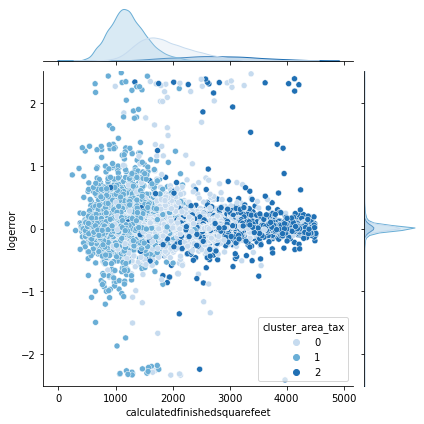

In [40]:
# calculatedfinishedsquarefeet and taxamount
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_area_tax', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

In [41]:

# latitude, longitude, age
train.groupby('cluster_location_age').mean()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,age
cluster_location_age,,,,,,,,,,,,,,,,,,,,,
0,1.290284e+07,2.005879,3.064274,6.104805,1547.082646,6048.082759,33.995994,-118.202500,23402.386998,6.048378e+07,...,2541.422838,96516.030865,2.088525,120694.435048,351194.995873,2016.0,230500.560825,4311.189142,0.018009,56.974618
1,1.342422e+07,2.515968,2.923662,6.722982,1799.905927,6054.303420,34.010507,-118.157719,38080.160344,6.054589e+07,...,2290.088273,96770.717581,1.438696,209224.523902,451774.179679,2016.0,242549.655777,5551.814877,0.015478,26.503767
2,1.212964e+07,1.593565,2.653855,5.333626,1407.792884,6039.417307,34.023906,-118.256011,8493.005491,6.039759e+07,...,2997.243136,96230.461234,0.328135,110109.441028,372200.209313,2016.0,262090.768285,4636.155385,0.009767,88.278717


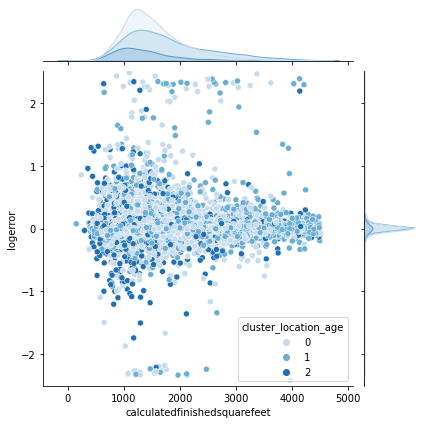

In [42]:
# latitude, longitude, age
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='cluster_location_age', palette='Blues', ylim=(-2.5, 2.5))
plt.show()

### Takeaways
- Based off visuals and metrics taken on the 3 cluster groups, the cluster_area_tax group has the most relevant data that will hold the most weight for a model
- Cluster_area_tax will more than likely be the only cluster group I use as a feature when modeling

## Let's Build Some Models
- First, add cluster features to train validate samples.
- Set up prediction tables
- Apply models to samples and make predictions

In [43]:
# set up cluster for validate
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_validate_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
validate['cluster_area_tax'] = kmeans.predict(X)
validate.cluster_area_tax = validate.cluster_area_tax.astype('category')


# add cluster to data
dummy_df = pd.get_dummies(train['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to train 
x_train_scaled = pd.concat([x_train_scaled, dummy_df], axis=1)

# add cluster to validate data
dummy_df = pd.get_dummies(validate['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to validate 
x_validate_scaled = pd.concat([x_validate_scaled, dummy_df], axis=1)

# Make a baseline prediction using the Logerror average.

# train
predictions = pd.DataFrame()
predictions['actual'] = train.logerror
predictions['baseline'] = train.logerror.mean()

# validate
validate_predictions = pd.DataFrame()
validate_predictions['actual'] = validate.logerror
validate_predictions['baseline'] = validate.logerror.mean()

predictions['baseline']

21484    0.015982
33086    0.015982
32261    0.015982
49909    0.015982
52282    0.015982
           ...   
48304    0.015982
60724    0.015982
74223    0.015982
67097    0.015982
21771    0.015982
Name: baseline, Length: 37242, dtype: float64

### Baseline model

In [44]:
# Our 'Adv. Baseline' is just a simple linear regression based off age

x_train_bl = x_train_scaled[['age']]
x_validate_bl = x_validate_scaled[['age']]

model = sklearn.linear_model.LinearRegression()

# train
model.fit(x_train_bl, y_train)
predictions['adv_baseline'] = model.predict(x_train_bl)

# validate
validate_predictions['adv_baseline_validate'] = model.predict(x_validate_bl)

# score
model.score(x_train_bl, y_train)

5.155642312448805e-05

In [45]:
# The math behind our advanced baseline model
m, b = model.coef_[0], model.intercept_

print(f'Tax Value = {m:.4f} x sqr_feet + {b:.4f}')

Tax Value = -0.0001 x sqr_feet + 0.0185


### Multiple Regression

In [46]:
# multiple regression
model = sklearn.linear_model.LinearRegression()

# train
model.fit(x_train_scaled, y_train)
predictions['multi_regression'] = model.predict(x_train_scaled)

# validate
validate_predictions['multi_regression_validate'] = model.predict(x_validate_scaled)

# score
model.score(x_train_scaled, y_train)

0.0034316633515676376

### Multiple regression with RFE

In [47]:
# Multiple regression with RME
model = sklearn.linear_model.LinearRegression()
rfe = sklearn.feature_selection.RFE(model, n_features_to_select=4)

# train
rfe.fit(x_train_scaled, y_train)
x_train_rfe = rfe.transform(x_train_scaled)
model.fit(x_train_rfe, y_train)
predictions['multiple_rfe'] = model.predict(x_train_rfe)

# validate
x_validate_rfe = rfe.transform(x_validate_scaled)
validate_predictions['multiple_rfe_validate'] = model.predict(x_validate_rfe)

# score
model.score(x_train_rfe, y_train)

0.00040608245114959196

### KNN (k=2)

In [48]:
# KNN (k=2)
model = KNeighborsRegressor(n_neighbors=2)

# train
model.fit(x_train_scaled, y_train)
predictions['KNN(k=2)'] = model.predict(x_train_scaled)

# validate
validate_predictions['KNN(k=2)_validate'] = model.predict(x_validate_scaled)

# score
model.score(x_train_scaled, y_train)

0.5013147225411216

### Compare our train and validate predictions
- The numbers don't lie
- Compare performance metrics of each model
- Use RMSE for determining the best model

In [49]:
# Compare how these models work on the train sample
pd.concat([
    predictions.apply(lambda col: r2_score(predictions.actual, col)).rename('r2'),
    predictions.apply(lambda col: mean_squared_error(predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000,0.000000,0.000000
baseline,0.000000,0.027735,0.166539
adv_baseline,0.000052,0.027734,0.166535
multi_regression,0.003432,0.027640,0.166253
multiple_rfe,0.000406,0.027724,0.166506
KNN(k=2),0.501315,0.013831,0.117606


In [50]:
# Compare how these models work on the validate sample
pd.concat([
    validate_predictions.apply(lambda col: r2_score(validate_predictions.actual, col)).rename('r2'),
    validate_predictions.apply(lambda col: mean_squared_error(validate_predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000e+00,0.000000,0.000000
baseline,1.110223e-16,0.023563,0.153504
adv_baseline_validate,-1.115077e-04,0.023566,0.153512
multi_regression_validate,3.689467e-04,0.023555,0.153476
multiple_rfe_validate,6.537312e-05,0.023562,0.153499
KNN(k=2)_validate,-4.688002e-01,0.034610,0.186038


### Takeaways

- RMSE was used to compare the models to determine how much errror the typical prediction would have.
- Multiple regression juuuuuust outperforms the baseline RMSE.
- I'll use the Regression to test.

### Verify Model on Test data

- Add cluster feature to test data sample
- Set up predictions table
- Apply model to test sample and make predictions of logerror

In [51]:
# set up cluster for test
cols = ['calculatedfinishedsquarefeet', 'taxamount']
X = x_test_scaled[cols]

# make it
kmeans = KMeans(n_clusters=3).fit(X)
test['cluster_area_tax'] = kmeans.predict(X)
test.cluster_area_tax = test.cluster_area_tax.astype('category')
dummy_df = pd.get_dummies(test['cluster_area_tax'], dummy_na=False, drop_first=True)

# append dummy df cols to the original df. 
x_test_scaled = pd.concat([x_test_scaled, dummy_df], axis=1)


# test predictions and baseline
test_predictions = pd.DataFrame()
test_predictions['actual'] = test.logerror
test_predictions['baseline'] = test.logerror.median()

In [52]:

# make it
model = sklearn.linear_model.LinearRegression()

# fit it
model.fit(x_train_scaled, y_train)

# use it
test_predictions['multi_regression'] = model.predict(x_test_scaled)

In [53]:
pd.concat([
    test_predictions.apply(lambda col: r2_score(test_predictions.actual, col)).rename('r2'),
    test_predictions.apply(lambda col: mean_squared_error(test_predictions.actual, col)).rename('mse'),
], axis=1).assign(
    rmse=lambda df: df.mse.apply(math.sqrt)
)

,r2,mse,rmse
actual,1.000000,0.000000,0.000000
baseline,-0.005036,0.026661,0.163283
multi_regression,0.003612,0.026432,0.162579


### In Conclusion

While my model outperformed the baseline on both train and validate, when applied to the test sample, the regression beat out our baseline.

Even so, the regression model did outperform the baseline in both Train and Validate and clustering didn't really have any affect.

### If I had more time, I would:

- Remove more outliers that could help fine tune the model.
- Improved clustering through unexplored variables.
- Bin the age columns for an easier read.
